In [42]:
pip install shap


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
import shap
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [44]:
df = pd.read_csv(
    r'C:\Users\aarve\OneDrive\Desktop\Customer Churn Analysis\Customer-Churn-Analysis-for-a-Telecom-Company-week-1\Week_2_Preprocessing\Week_2_Preprocessing\preprocessed_data.csv'
)
df.head()


customerID  gender  SeniorCitizen  Partner  Dependents    tenure  \
0        5365       0              0        1           0 -1.280248   
1        3953       1              0        0           0  0.064303   
2        2558       1              0        0           0 -1.239504   
3        5524       1              0        0           0  0.512486   
4        6500       0              0        0           0 -1.239504   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              1                0               0  ...   
1             1              0                0               2  ...   
2             1              0                0               2  ...   
3             0              1                0               2  ...   
4             1              0                1               0  ...   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2       -1.161694     -0.994194      0  
1                 0              3       -0.260878     -0.173740      0  
2                 1              3       -0.363923     -0.959649      1  
3                 0              0       -0.747850     -0.195248      0  
4                 1              2        0.196178     -0.940457      1  

[5 rows x 21 columns]

In [45]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [47]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [49]:
shap_values = explainer(X_test, check_additivity=False)


100%|===================| 2806/2814 [04:43<00:00]        

In [53]:
pip install shap


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
import shap


In [58]:
# Initialize SHAP TreeExplainer with the trained Random Forest model
explainer = shap.Explainer(rf_model, X_train)


In [59]:
# Calculate SHAP values for test data
shap_values = explainer(X_test, check_additivity=False)


100%|===================| 2808/2814 [04:41<00:00]        

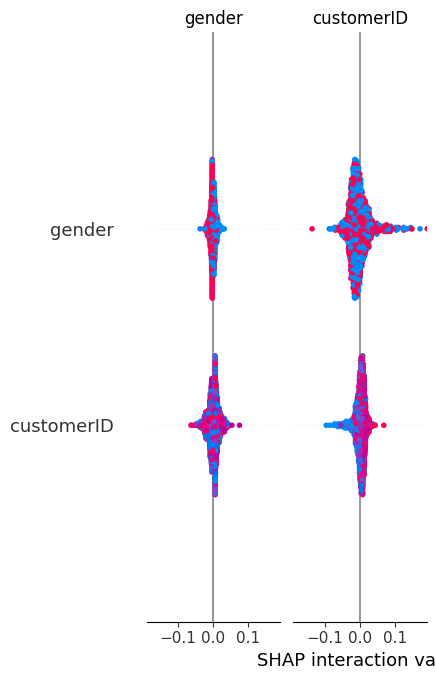

In [60]:
# Visualize SHAP feature importance
shap.summary_plot(shap_values, X_test)


In [64]:
# Debug: Check what SHAP returned
print("Type of shap_values:", type(shap_values))
if isinstance(shap_values, list):
    print("Number of classes:", len(shap_values))
    print("Shape of each:", [s.shape for s in shap_values])
else:
    print("SHAP values shape:", shap_values.shape)


Type of shap_values: <class 'shap._explanation.Explanation'>
SHAP values shape: (1407, 20, 2)


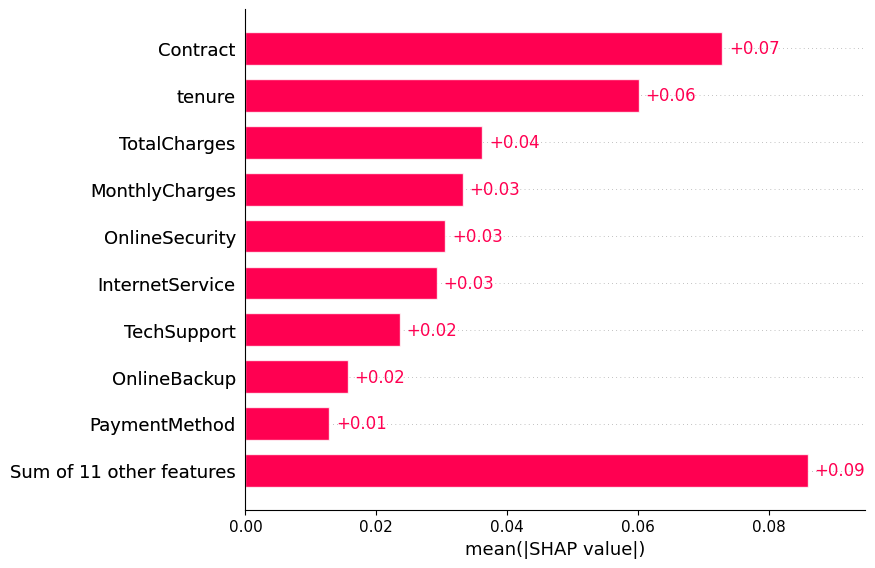

In [65]:
import shap

# Select SHAP values for class 1 (Churn = Yes)
shap_values_yes = shap_values[..., 1]  # shape: (1407, 20)

# Draw the bar plot for Churn = Yes
shap.plots.bar(shap_values_yes, max_display=10)


Plotting for: customerID


<Figure size 1000x600 with 0 Axes>

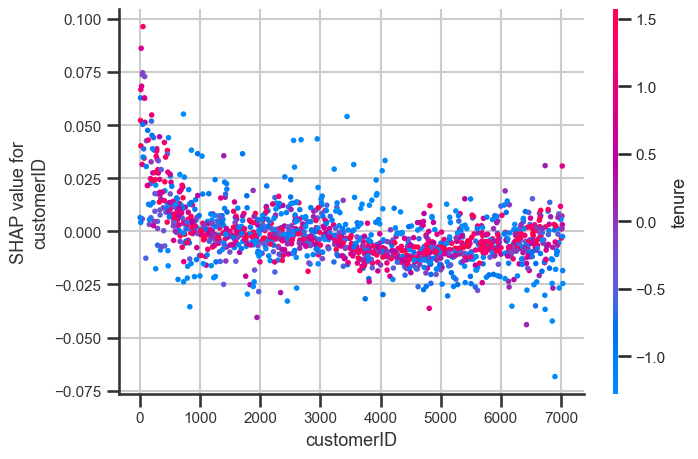

Plotting for: gender


<Figure size 1000x600 with 0 Axes>

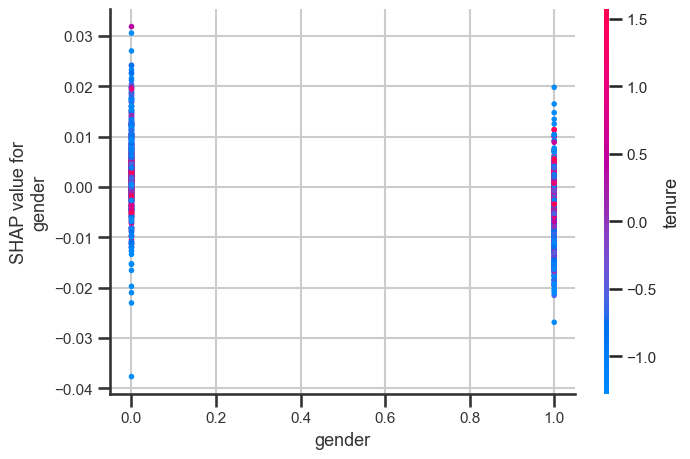

Plotting for: SeniorCitizen


<Figure size 1000x600 with 0 Axes>

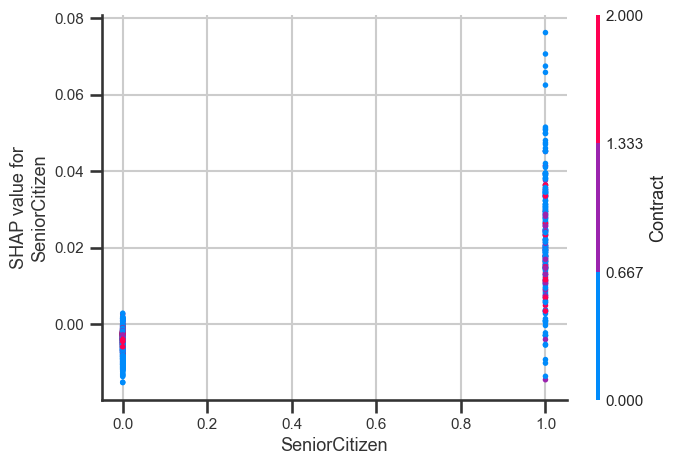

Plotting for: Partner


<Figure size 1000x600 with 0 Axes>

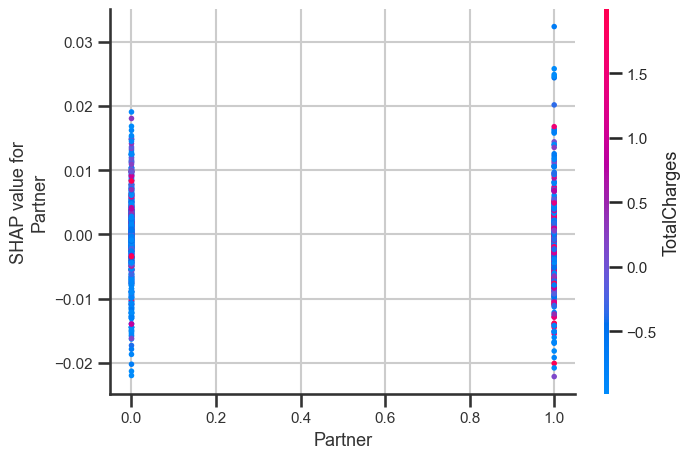

Plotting for: Dependents


<Figure size 1000x600 with 0 Axes>

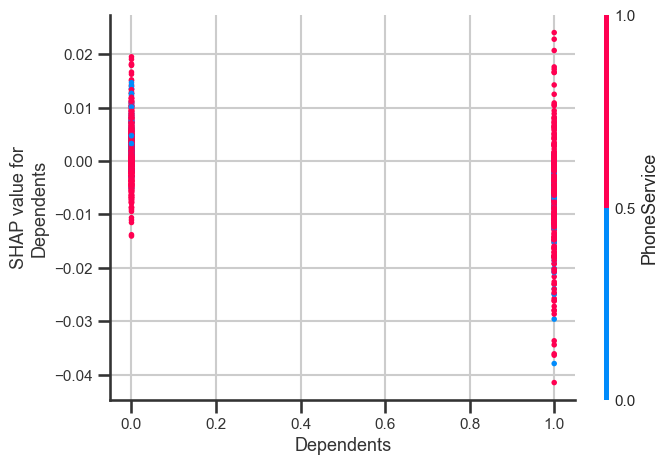

Plotting for: tenure


<Figure size 1000x600 with 0 Axes>

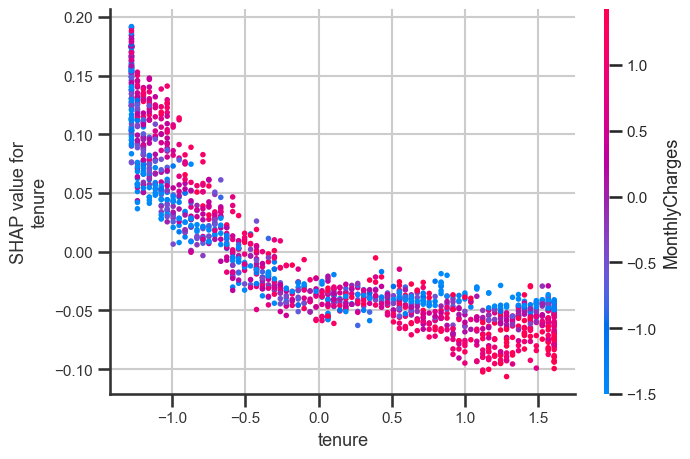

Plotting for: PhoneService


<Figure size 1000x600 with 0 Axes>

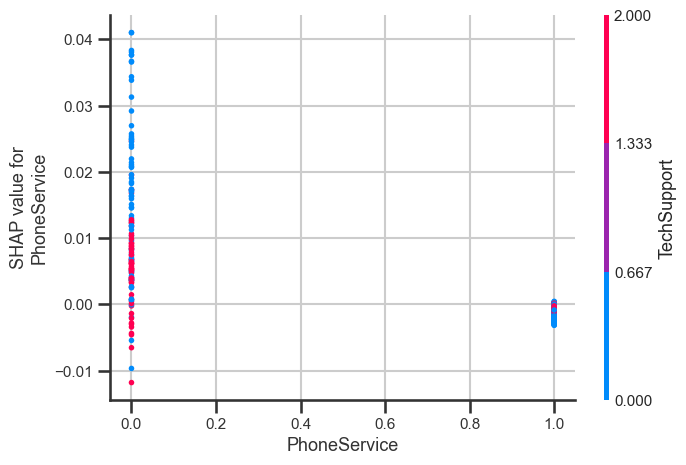

Plotting for: MultipleLines


<Figure size 1000x600 with 0 Axes>

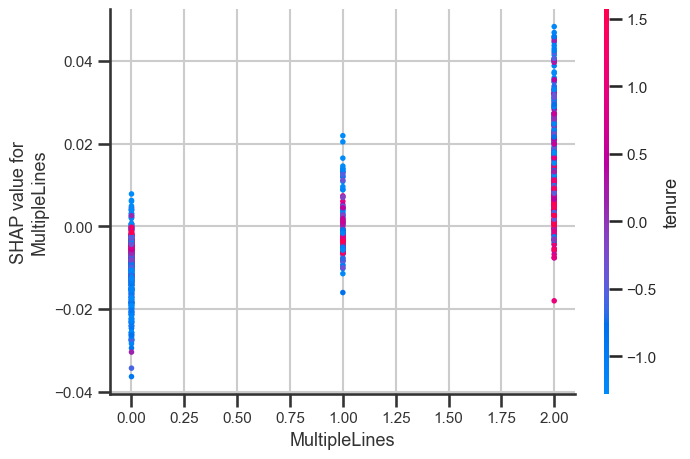

Plotting for: InternetService


<Figure size 1000x600 with 0 Axes>

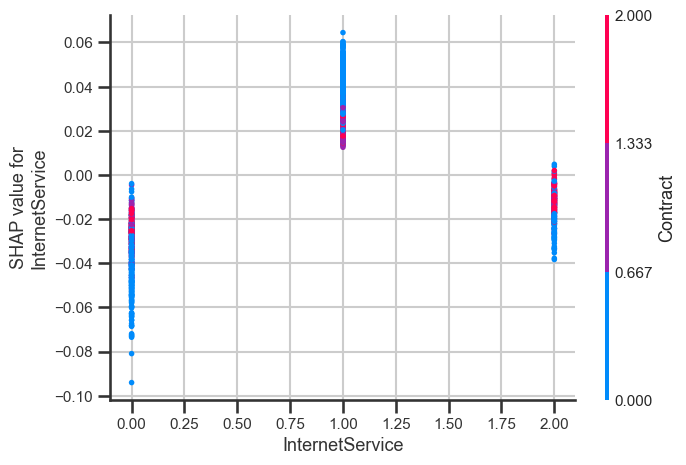

Plotting for: OnlineSecurity


<Figure size 1000x600 with 0 Axes>

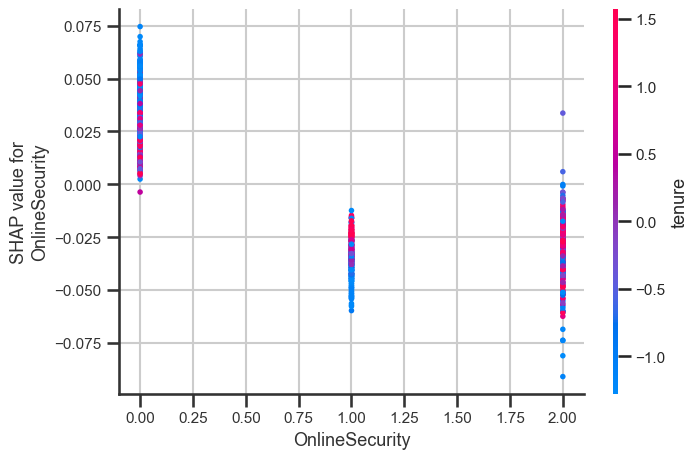

Plotting for: OnlineBackup


<Figure size 1000x600 with 0 Axes>

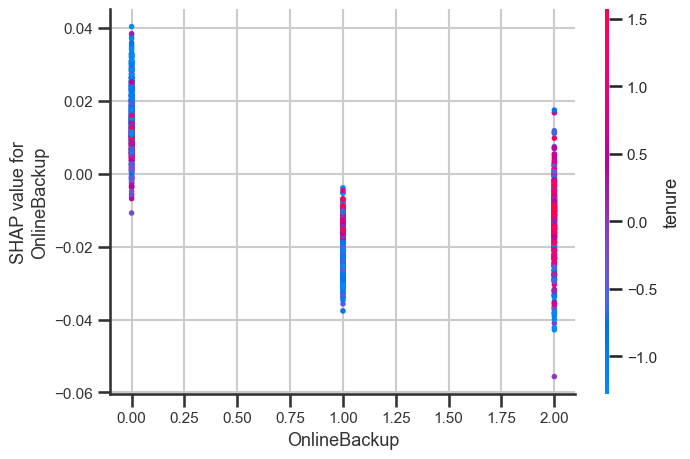

Plotting for: DeviceProtection


<Figure size 1000x600 with 0 Axes>

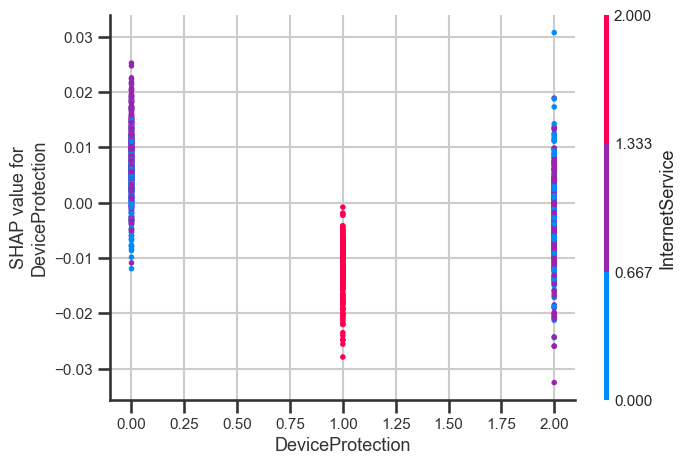

Plotting for: TechSupport


<Figure size 1000x600 with 0 Axes>

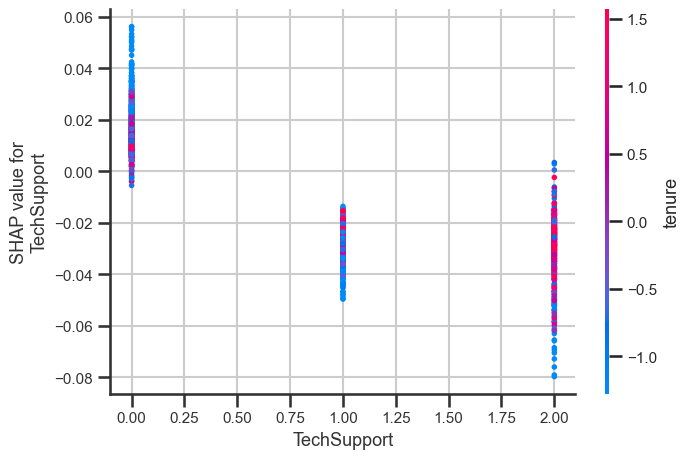

Plotting for: StreamingTV


<Figure size 1000x600 with 0 Axes>

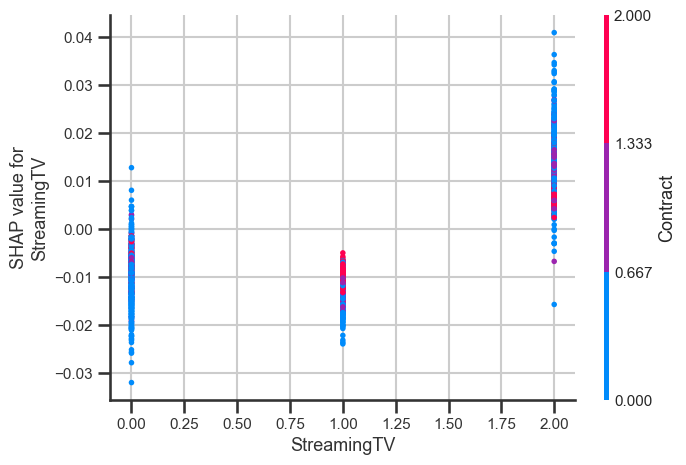

Plotting for: StreamingMovies


<Figure size 1000x600 with 0 Axes>

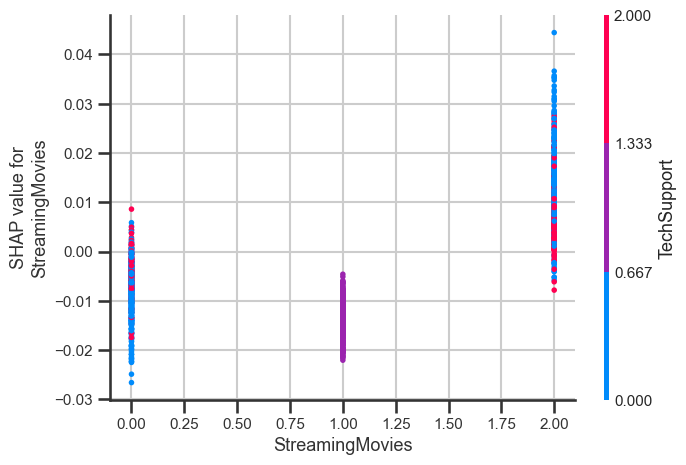

Plotting for: Contract


<Figure size 1000x600 with 0 Axes>

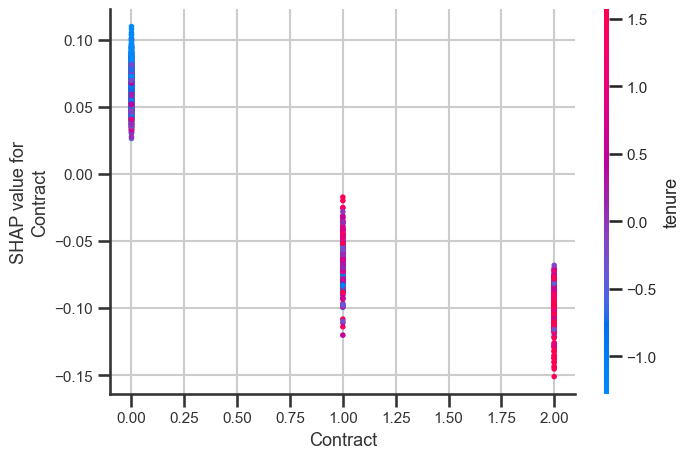

Plotting for: PaperlessBilling


<Figure size 1000x600 with 0 Axes>

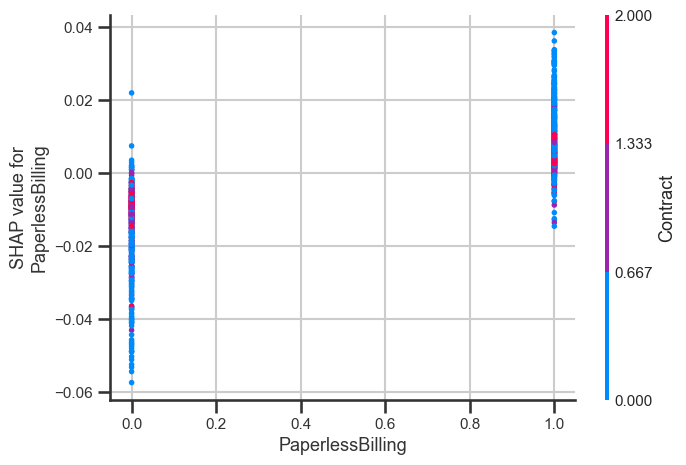

Plotting for: PaymentMethod


<Figure size 1000x600 with 0 Axes>

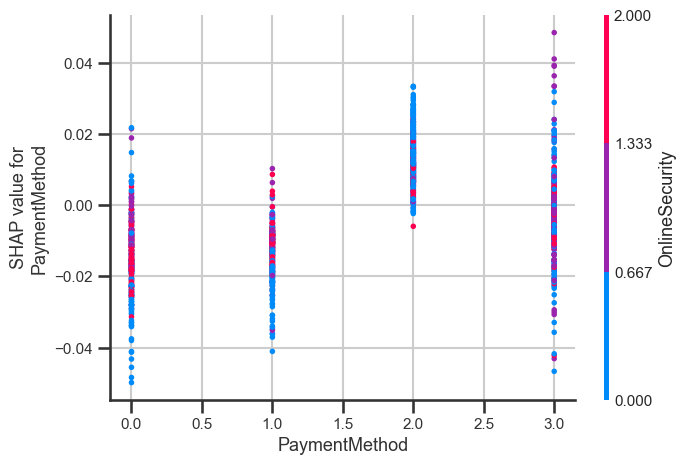

Plotting for: MonthlyCharges


<Figure size 1000x600 with 0 Axes>

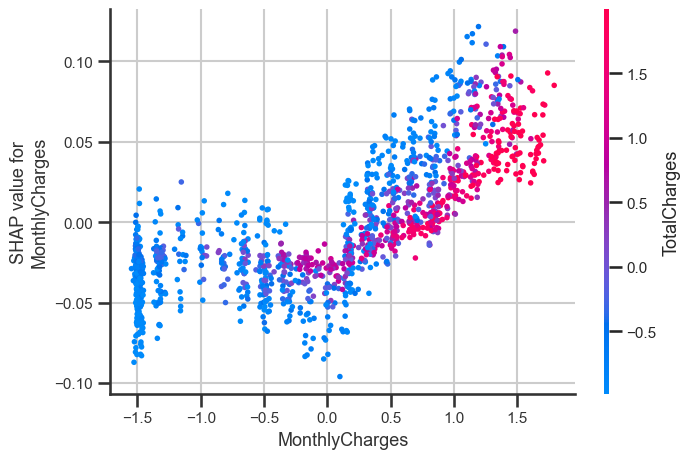

Plotting for: TotalCharges


<Figure size 1000x600 with 0 Axes>

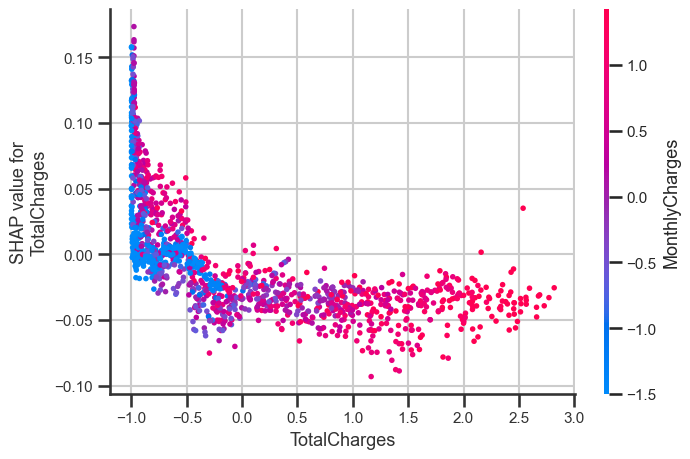

In [ ]:
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# Activate JS-based visualization for interactive use
shap.initjs()

# Set seaborn theme for aesthetic plots
sns.set(style="whitegrid", context="talk")  # 'talk' = bigger fonts, better for presentations

# Update matplotlib parameters globally
matplotlib.rcParams.update({
    'figure.figsize': (10, 6),
    'axes.titlesize': 18,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12
})

# Use a visually rich colormap like 'coolwarm' or 'viridis'
custom_cmap = plt.get_cmap("coolwarm")

# Loop through each feature to plot
for feature in X_test.columns:
    print(f"Plotting for: {feature}")
    plt.figure()

    # Use interaction_index='auto' to get color gradient based on interacting feature
    shap.dependence_plot(
        feature,
        shap_values.values[:, :, 1],  # Class 1: Churn = Yes
        X_test,
        interaction_index="auto",
        show=True,
        color=custom_cmap
    )


In [72]:
# Select a single customer (e.g., index 0)
i = 0

shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values.values[i,:,1], X_test.iloc[i,:])


In [73]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values.values[:,:,1], X_test)


In [76]:
import shap

# Sample top 3 churned customers from X_test
X_test_sample = X_test[y_test == 1].iloc[:3]

# Compute SHAP values for these samples
shap_values_sample = explainer(X_test_sample)

# Extract the values for class 1 (Churn) manually
shap_values_churn = shap.Explanation(
    values=shap_values_sample.values[:, :, 1],
    base_values=shap_values_sample.base_values[:, 1],
    data=X_test_sample,
    feature_names=X_test_sample.columns
)


In [77]:
# Initialize JavaScript visualization
shap.initjs()

# Display force plot
shap.plots.force(shap_values_churn)


In [78]:
# Save to HTML file for sharing or presentation
shap.save_html("shap_multiple_customers_force_plot.html", shap.plots.force(shap_values_churn))


In [79]:
# Pick the first churned customer from test data
index = y_test[y_test == 1].index[0]
customer_data = X_test.loc[[index]]  # double brackets to keep it as DataFrame


In [80]:
# Get SHAP values for the selected customer
shap_values_single = explainer(customer_data)

# Select SHAP values for class 1 (Churn)
shap_values_churn_single = shap.Explanation(
    values=shap_values_single.values[:, :, 1],
    base_values=shap_values_single.base_values[:, 1],
    data=customer_data,
    feature_names=customer_data.columns
)


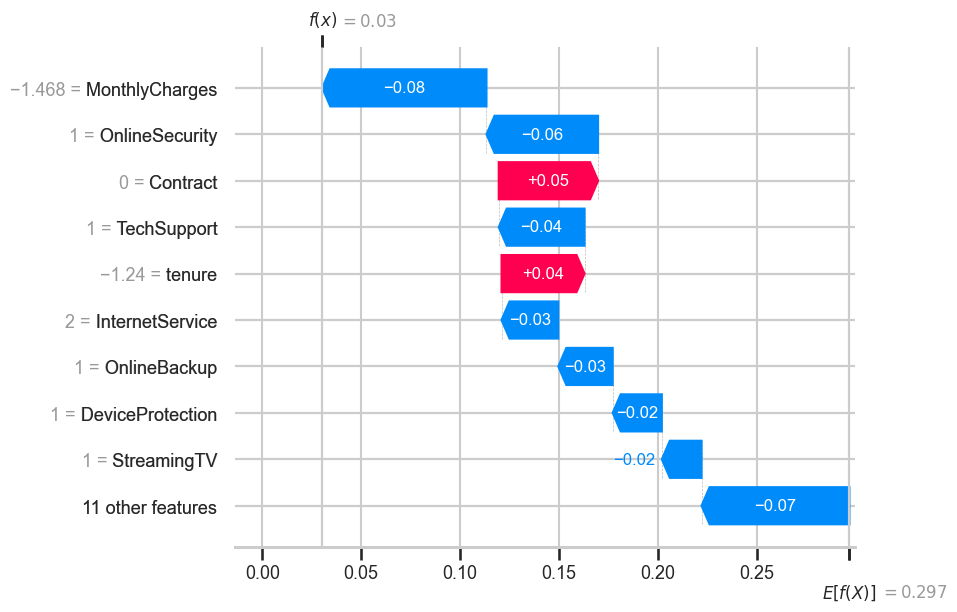

In [81]:
# Waterfall plot for the selected customer
shap.plots.waterfall(shap_values_churn_single[0])


Customer ID: 3715


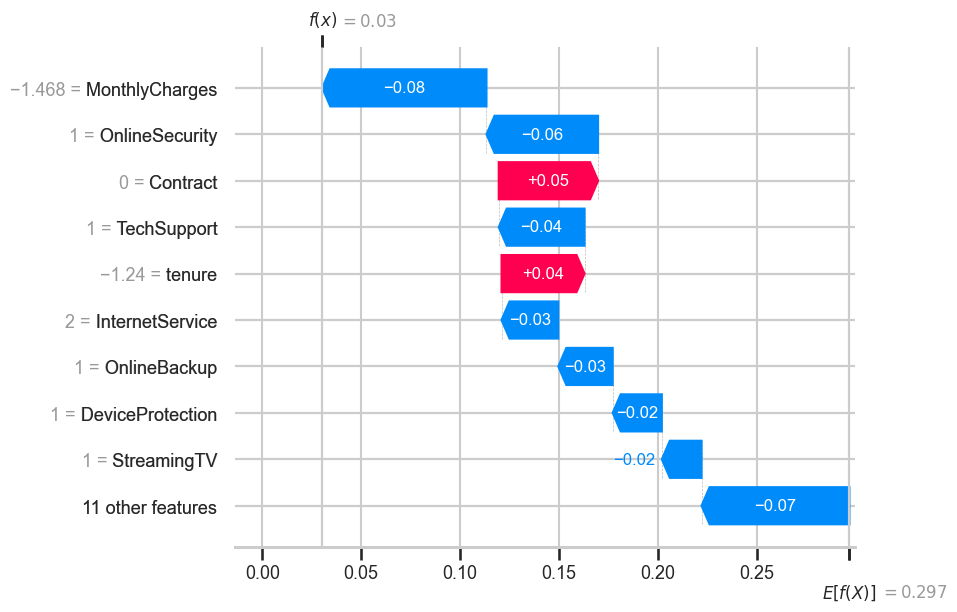

Customer ID: 445


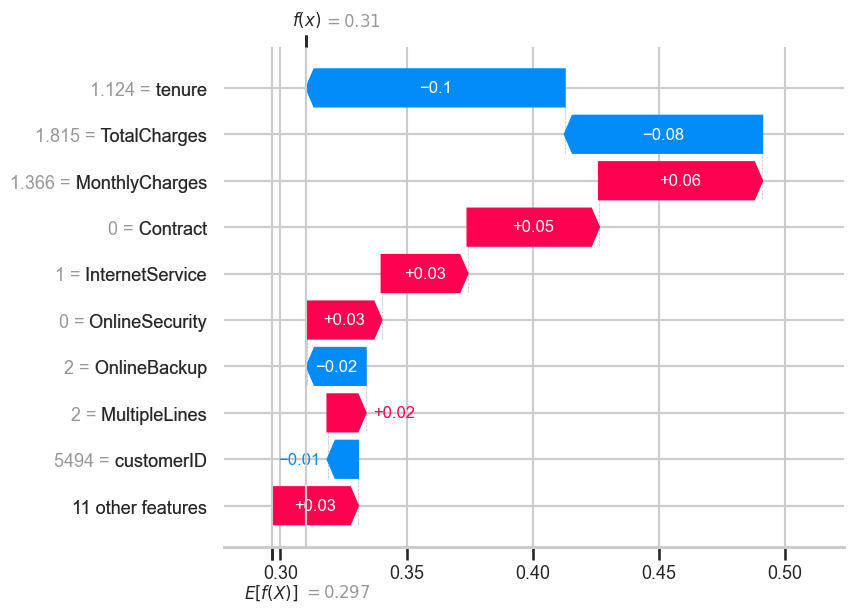

Customer ID: 1341


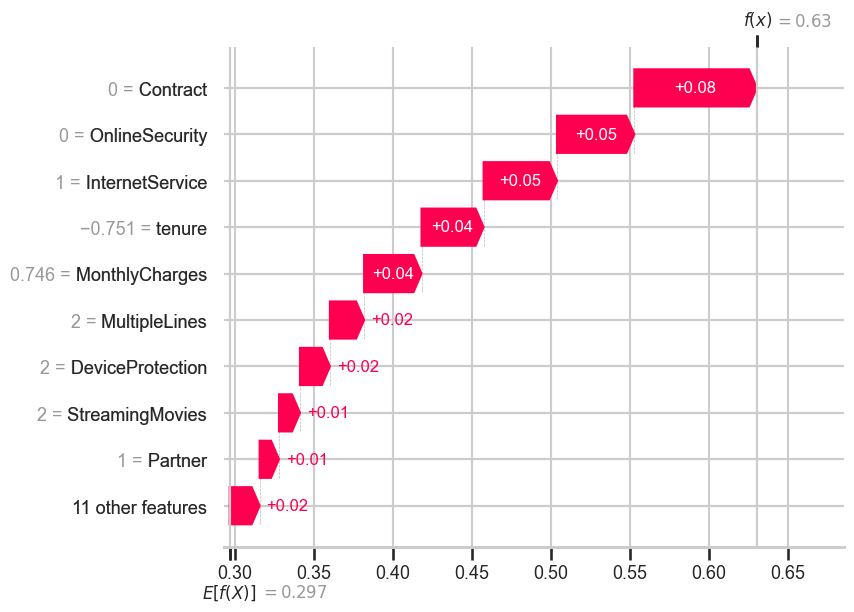

In [82]:
for idx in y_test[y_test == 1].index[:3]:
    print(f"Customer ID: {idx}")
    customer_data = X_test.loc[[idx]]
    shap_values_single = explainer(customer_data)
    shap_values_churn_single = shap.Explanation(
        values=shap_values_single.values[:, :, 1],
        base_values=shap_values_single.base_values[:, 1],
        data=customer_data,
        feature_names=customer_data.columns
    )
    shap.plots.waterfall(shap_values_churn_single[0])


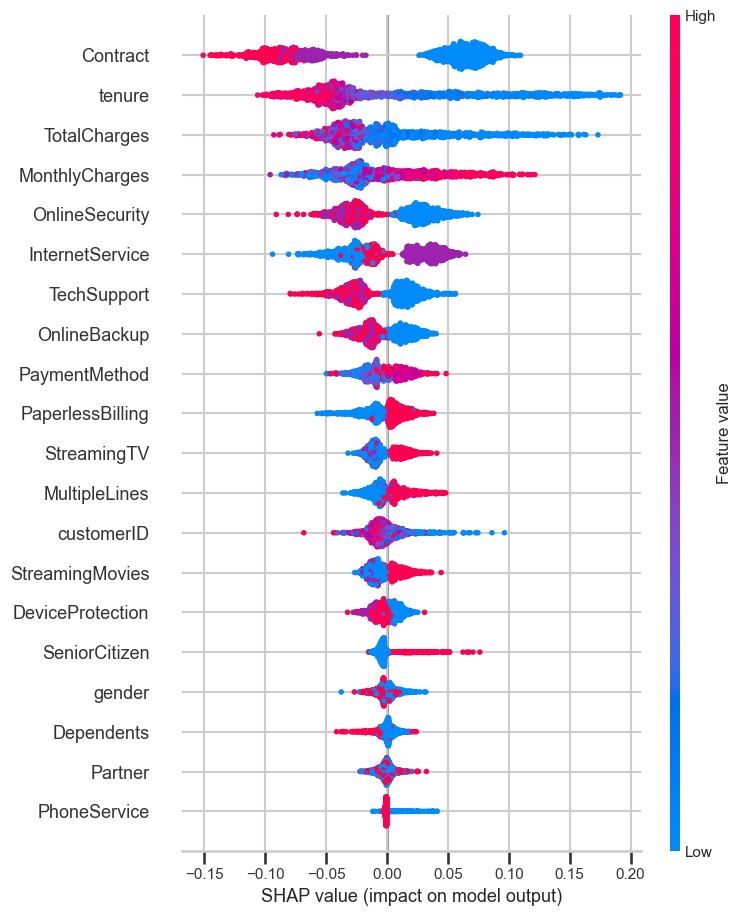

In [88]:
# Save summary plot (optional)
shap.summary_plot(shap_values[:, :, 1], X_test, show=False)
plt.savefig("shap_summary_plot.png")


In [89]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt


In [90]:
y_pred = rf_model.predict(X_test)


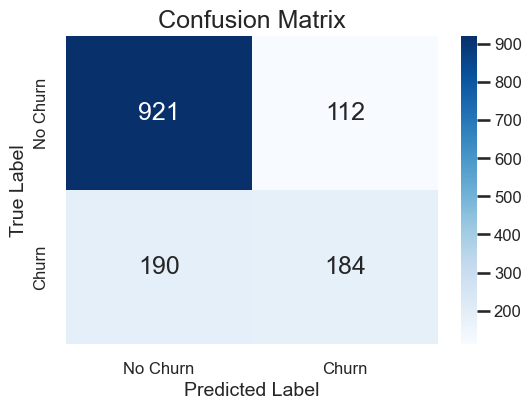

In [91]:
cm = confusion_matrix(y_test, y_pred)

# Plot
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [92]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))


Classification Report:

              precision    recall  f1-score   support

    No Churn       0.83      0.89      0.86      1033
       Churn       0.62      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.77      0.79      0.78      1407



In [93]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.4f}")


Accuracy Score: 0.7854


In [94]:
import joblib

# Save the Random Forest model
joblib.dump(rf_model, 'rf_churn_model.pkl')
print("✅ Model saved as rf_churn_model.pkl")


✅ Model saved as rf_churn_model.pkl


In [95]:
rf_loaded = joblib.load('rf_churn_model.pkl')


In [96]:
import numpy as np

# Save SHAP values (numpy format)
np.save('shap_values.npy', shap_values.values)
np.save('X_test_shap.npy', X_test.values)
print("✅ SHAP values and test data saved.")


✅ SHAP values and test data saved.


In [97]:
from sklearn.metrics import classification_report

# Generate the report
report = classification_report(y_test, y_pred, target_names=['No Churn', 'Churn'])

# Save to text file
with open("classification_report.txt", "w") as file:
    file.write(report)

print("✅ Classification report saved to classification_report.txt")


✅ Classification report saved to classification_report.txt


In [98]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig("confusion_matrix.png")
plt.close()
print("✅ Confusion matrix image saved as confusion_matrix.png")


✅ Confusion matrix image saved as confusion_matrix.png


In [99]:
shap.summary_plot(shap_values[:,:,1], X_test, show=False)
plt.savefig("shap_summary_plot.png", bbox_inches='tight')
plt.close()
print("✅ SHAP summary plot saved as shap_summary_plot.png")


✅ SHAP summary plot saved as shap_summary_plot.png


In [104]:
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re


In [105]:
shap.initjs()
sns.set(style="whitegrid", context="talk")

plt.rcParams.update({
    'figure.figsize': (10, 6),
    'axes.titlesize': 18,
    'axes.labelsize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12
})


In [106]:
# Folder where plots will be saved
output_folder = "shap_dependence_plots"
os.makedirs(output_folder, exist_ok=True)

# Helper to clean filenames
def clean_filename(name):
    return re.sub(r'[^\w\-_. ]', '_', name)


In [107]:
custom_cmap = plt.get_cmap("coolwarm")

for feature in X_test.columns:
    try:
        print(f"Saving plot for: {feature}")
        plt.figure()

        # Create dependence plot
        shap.dependence_plot(
            feature,
            shap_values.values[:, :, 1],  # class=1 for churn
            X_test,
            interaction_index="auto",
            show=False,   # Do not display
            color=custom_cmap
        )

        # Save the plot with cleaned filename
        safe_name = clean_filename(feature)
        plt.savefig(os.path.join(output_folder, f"{safe_name}.png"), bbox_inches='tight')
        plt.close()

    except Exception as e:
        print(f"⚠️ Error for feature {feature}: {e}")


Saving plot for: customerID
Saving plot for: gender
Saving plot for: SeniorCitizen
Saving plot for: Partner
Saving plot for: Dependents
Saving plot for: tenure
Saving plot for: PhoneService
Saving plot for: MultipleLines
Saving plot for: InternetService
Saving plot for: OnlineSecurity
Saving plot for: OnlineBackup
Saving plot for: DeviceProtection
Saving plot for: TechSupport
Saving plot for: StreamingTV
Saving plot for: StreamingMovies
Saving plot for: Contract
Saving plot for: PaperlessBilling
Saving plot for: PaymentMethod
Saving plot for: MonthlyCharges
Saving plot for: TotalCharges


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>